# Task 2


Predictive modeling of customer bookings
This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

Exploratory data analysis
First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [163]:
# Standard Libraries
import pandas as pd
import numpy as np
import os
pip install xgboost


# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# Data-Prep
from sklearn import preprocessing
from scipy import stats
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



# Model Buidling and metrics 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE


SyntaxError: invalid syntax (2596101455.py, line 5)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

In [ ]:
pip install xgboost

1.Loading the dataset

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head(10)

To provide more context, below is a more detailed data description, explaining exactly what each column means:

num_passengers = number of passengers travelling
sales_channel = sales channel booking was made on
trip_type = trip Type (Round Trip, One Way, Circle Trip)
purchase_lead = number of days between travel date and booking date
length_of_stay = number of days spent at destination
flight_hour = hour of flight departure
flight_day = day of week of flight departure
route = origin -> destination flight route
booking_origin = country from where booking was made
wants_extra_baggage = if the customer wanted extra baggage in the booking
wants_preferred_seat = if the customer wanted a preferred seat in the booking
wants_in_flight_meals = if the customer wanted in-flight meals in the booking
flight_duration = total duration of flight (in hours)
booking_complete = flag indicating if the customer completed the booking
Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df.info()

In [176]:
df["flight_day"].unique()

array([6, 3, 4, 1, 2, 5, 7], dtype=int64)

2.Data-preprocessing

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [175]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0,1,0,0,0,0,1,0,0
1,0.000000,0,0,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0,1,0,0,0,0,1,0,0
2,0.333333,0,0,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0,0,0,1,0,0,0,0,0
3,0.000000,0,0,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0,1,0,0,0,0,1,0,0
4,0.333333,0,0,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0,0,0,1,0,0,0,0,0


Checking for null values

In [164]:
df.isnull().sum()

num_passengers              0
sales_channel               0
trip_type                   0
purchase_lead               0
length_of_stay              0
flight_hour                 0
flight_day                  0
wants_extra_baggage         0
wants_preferred_seat        0
wants_in_flight_meals       0
flight_duration             0
booking_complete            0
is_weekend                  0
booking_continent_AF        0
booking_continent_AS        0
booking_continent_EU        0
booking_continent_NA        0
booking_continent_OC        0
booking_continent_Others    0
booking_continent_SA        0
dtype: int64

No null values in our dataset

In [165]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

df['is_weekend'] = is_weekend
df.head()

KeyError: 9

In [174]:
df['flight_day'].value_counts().reset_index().sort_values(by='index')

,index,flight_day
0,1,7572
2,2,7210
1,3,7307
3,4,7069
4,5,6451
6,6,5475
5,7,6031


We can see from the data above that weekends have fewer flights than weekdays, thus we should consider adding weekend flight schedules. However, in order to be effective, we must first determine which routes have the most passengers on weekends.

In [ ]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)

In [173]:
route[:10]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306
256,DPSICN,275
157,CTSDMK,264
377,ICNSYD,260
264,DPSPVG,255
151,COKSYD,250


### Data Cleaning

The idea behind this is to drop columns that has many unique values

### Drop redundant features

In [ ]:
df['route'].value_counts()

In [ ]:
#df.drop('flight_day',axis=1, inplace=True)
df.drop('route',axis=1, inplace=True)

In [178]:
df['booking_origin'].value_counts()

KeyError: 'booking_origin'

In [ ]:
import pycountry_convert as pc
continent = []
index = []

df['booking_origin'] =  df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    #print(country)
    try :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

df['booking_continent'] = continent

In [ ]:
df['booking_continent'].value_counts()

In [ ]:
df.drop('booking_origin',axis=1, inplace=True)

In [177]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0,1,0,0,0,0,1,0,0
1,0.000000,0,0,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0,1,0,0,0,0,1,0,0
2,0.333333,0,0,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0,0,0,1,0,0,0,0,0
3,0.000000,0,0,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0,1,0,0,0,0,1,0,0
4,0.333333,0,0,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0,0,0,1,0,0,0,0,0
5,0.000000,0,0,0.008499,0.380952,0.869565,4,1,0,1,0.175983,0,0,0,0,0,0,1,0,0
6,0.666667,0,0,0.569405,0.261905,0.260870,4,1,0,1,0.175983,0,0,0,0,0,0,1,0,0
7,0.333333,0,0,0.674221,0.150794,0.608696,1,1,0,1,0.175983,0,0,0,1,0,0,0,0,0
8,0.000000,0,0,0.226629,0.174603,0.173913,1,0,0,1,0.175983,0,0,0,0,0,0,1,0,0
10,0.333333,0,0,0.524079,0.198413,0.608696,2,1,1,1,0.175983,0,0,0,0,1,0,0,0,0


### 2.2.Feature Encoding

In [ ]:
label_encode = ['sales_channel']
one_hot = ['booking_continent']
                
mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}               

df['trip_type'] = df['trip_type'].map(mapping_trip_type)

df['sales_channel'] = preprocessing.LabelEncoder().fit_transform(df['sales_channel'])

onehots = pd.get_dummies(df['booking_continent'], prefix='booking_continent')
df = df.join(onehots)

df.drop('booking_continent', axis=1, inplace=True)

In [ ]:
df.head(10)

### 2.3.Outlier detection

In [179]:
data_numerical.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.333333,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0
1,0.000000,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0
2,0.333333,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0
3,0.000000,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0
4,0.333333,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0


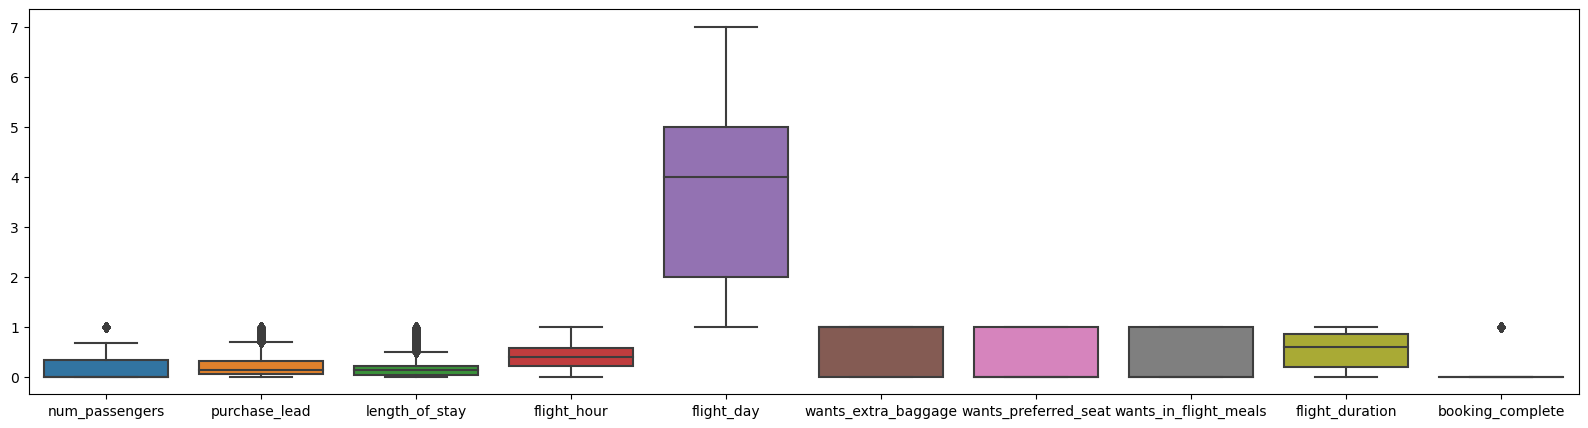

In [180]:
# Plotting boxplot for detecting outliers
plt.figure(figsize=(20,5))
sns.boxplot(data = data_numerical)
plt.show()

In [181]:
# Replacing outliers with median
#function to return a list of index of outliers
column_list = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration']

for feature in column_list:
    Q1= data_numerical[feature].quantile(0.25)
    Q3 =data_numerical[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    
    upper_limit = Q3 + 1.5 * IQR

median = data_numerical[feature].median()

data_numerical[feature] = np.where(data_numerical[feature]< lower_limit, median,data_numerical[feature])
data_numerical[feature] = np.where(data_numerical[feature]> upper_limit, median,data_numerical[feature])


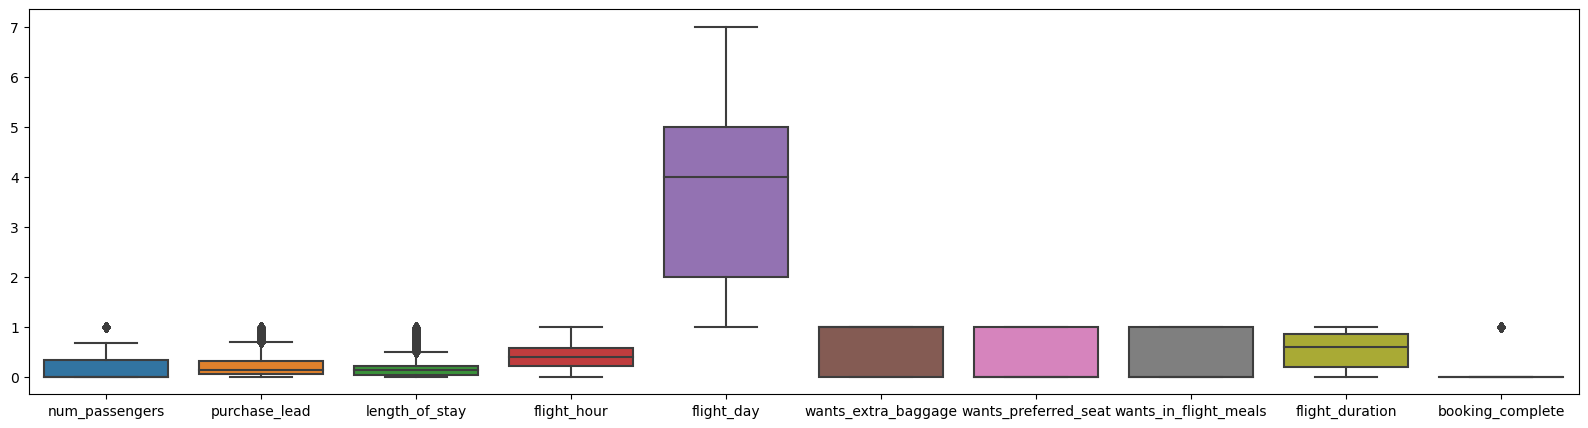

In [182]:
# Plotting boxplot for detecting outliers
plt.figure(figsize=(20,5))
sns.boxplot(data = data_numerical)
plt.show()

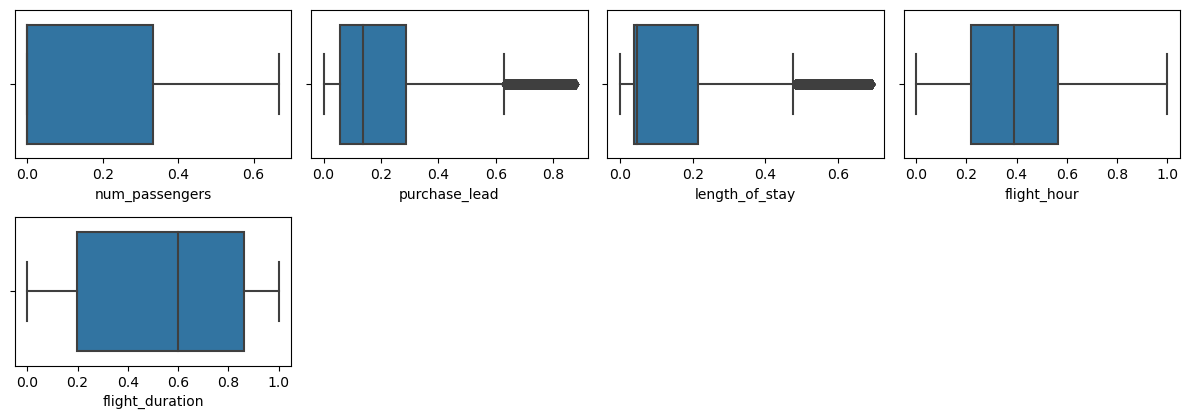

In [184]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

As we can see, there are a lot of outlier values on buy lead and length of stay, thus we will eliminate outlier using zscore so that not many columns are wasted.

In [183]:

print(f'Total rows before delete outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]
    
print(f'Total rows after delete outlier : {len(df)}')

Total rows before delete outlier : 47115
Total rows after delete outlier : 43386


C:\Users\OK\AppData\Local\Temp\ipykernel_20412\4186179628.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\OK\AppData\Local\Temp\ipykernel_20412\4186179628.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\OK\AppData\Local\Temp\ipykernel_20412\4186179628.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]
C:\Users\OK\AppData\Local\Temp\ipykernel_20412\4186179628.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[filtered_entries]


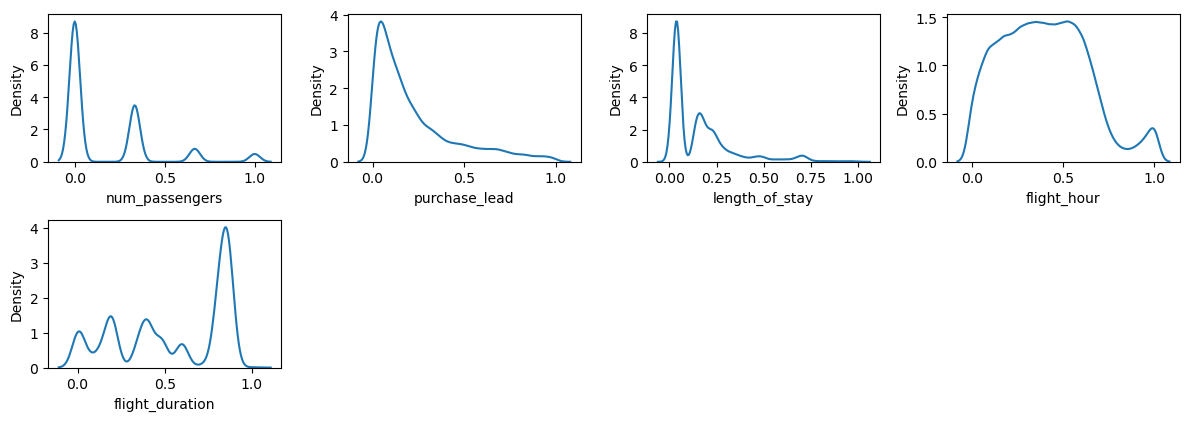

In [172]:
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()

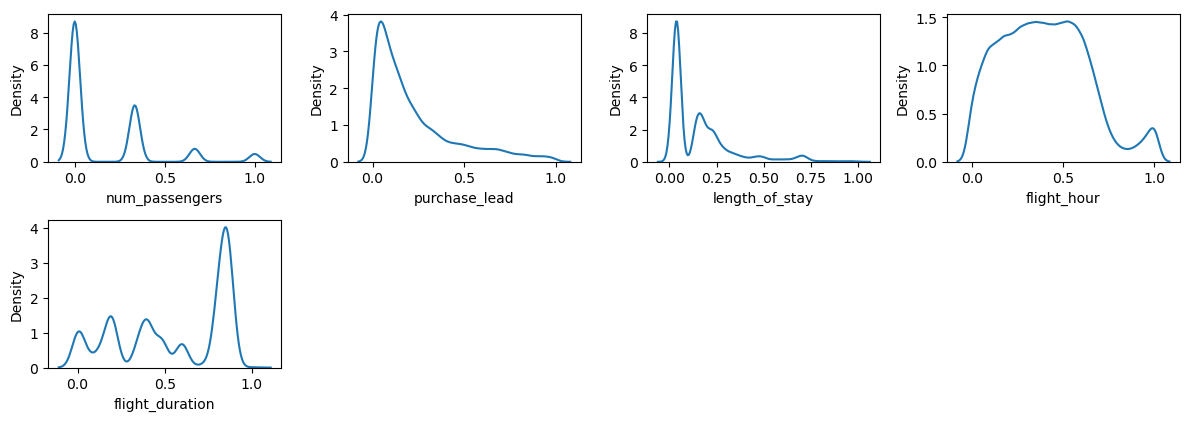

In [171]:
num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
num_features.head()

df[num] = num_features

plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df, x=df[column])
    plt.tight_layout()

Now the data has a better distribution than before feature transformation, meaning the machine learning model would have better results

In [ ]:
## Split Data

from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts(normalize=True)

Evidently, The Data is unbalance therefore there is a need to balance it with sampling.

### Sampling Data

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel())

### Train Machine learning Model

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_over)
  
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))

Accuracy (Test Set): 0.85
Precision (Test Set): 0.42
Recall (Test Set): 0.04
F1-Score (Test Set): 0.08
roc_auc (test-proba): 0.52
roc_auc (train-proba): 0.53


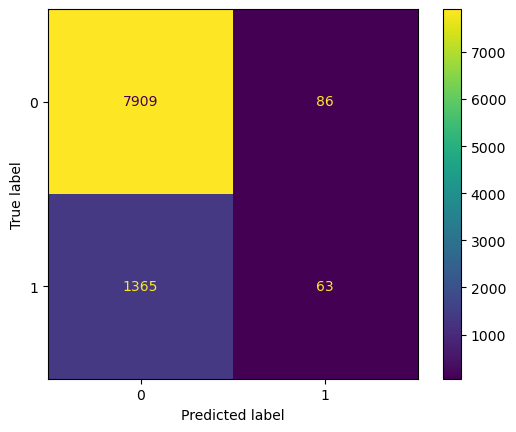

In [170]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

# Evaluate the model
confusionmatrix(predictions)
eval_classification(clf)

In [169]:

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(x_over, y_over)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.34
Recall (Test Set): 0.15
F1-Score (Test Set): 0.21
roc_auc (test-proba): 0.55
roc_auc (train-proba): 0.98


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7995
           1       0.34      0.15      0.21      1428

    accuracy                           0.83      9423
   macro avg       0.60      0.55      0.56      9423
weighted avg       0.78      0.83      0.80      9423



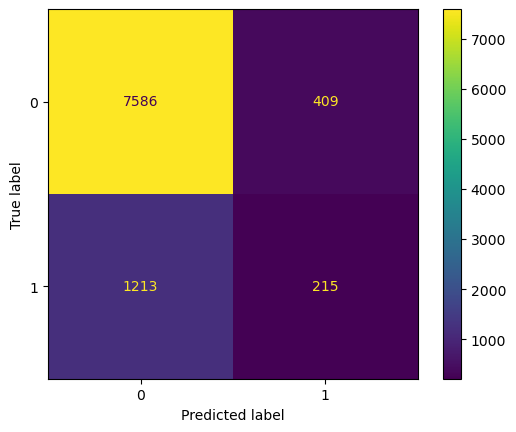

In [167]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)
print(classification_report(y_test, predictions))

### Features Importance

<Axes: >

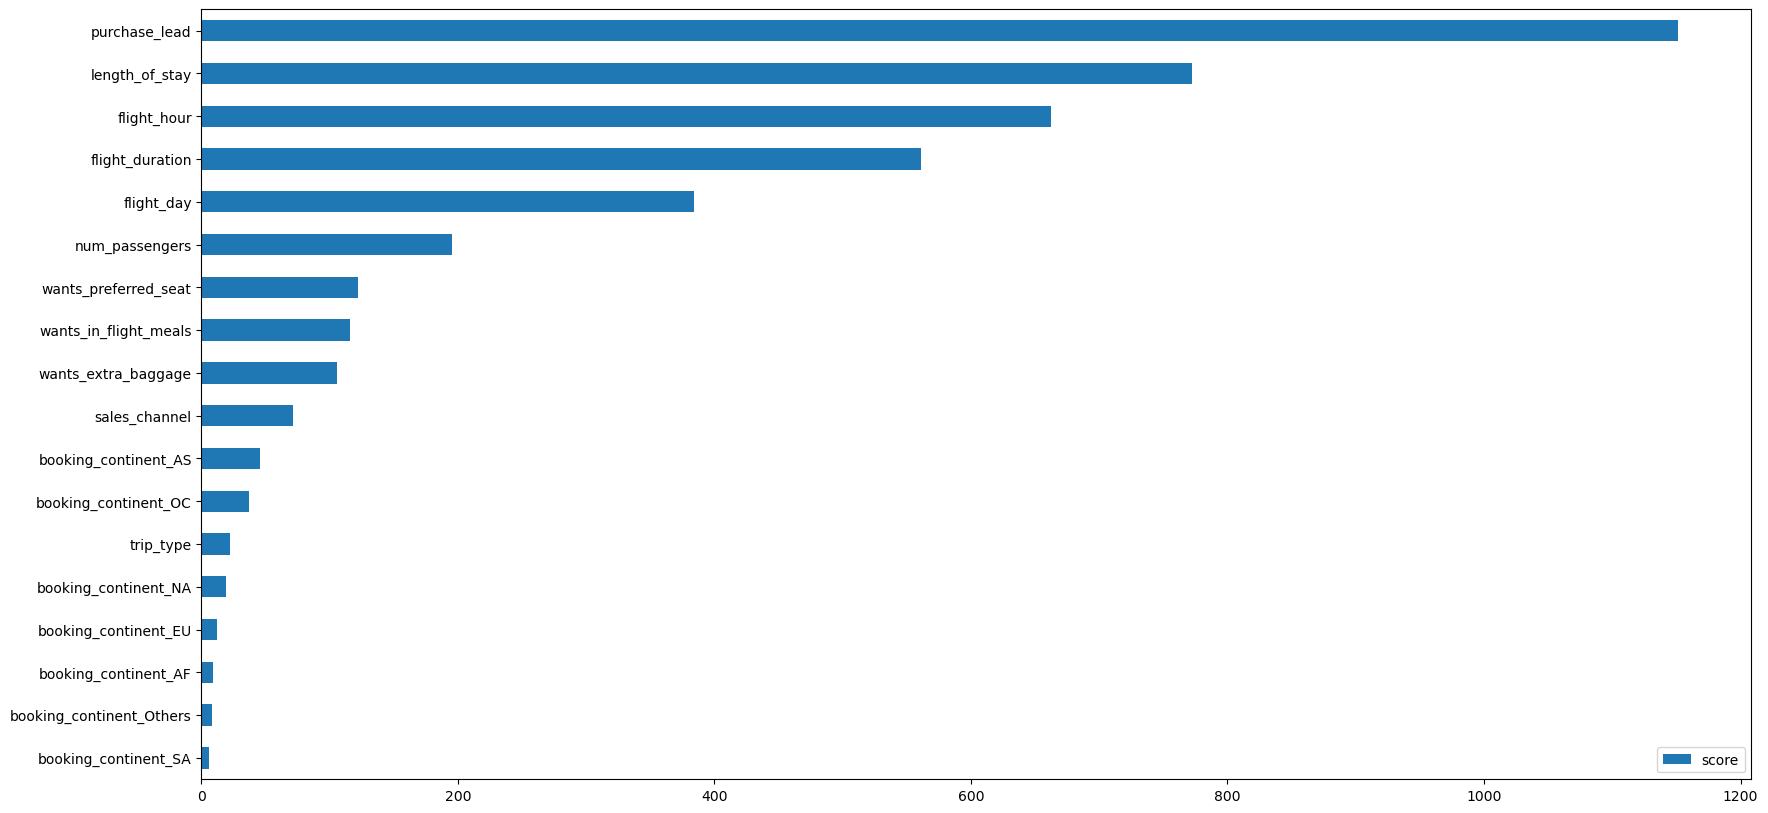

In [166]:
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (20,10)) ## plot top 40 features